In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
from matplotlib.colors import ListedColormap
import networkx as nx
from numpy import nan
import math
import sys
import os

In [2]:
df = pd.read_excel("/Users/tsinghua/OneDrive/df6.xlsx")

In [3]:
df.dropna(axis=0, how='any',inplace=True)

In [4]:
df.head()

,holding_shares,coverage_funds,total_share_holdings,seasonal_holding_change,total_market_value,closeness_fund,betweenness_fund,pagerank_fund,coverage_fund,clustering_fund,...,coverge_sec,clustering_sec,degree_centrality_sec,closeness_degree_sec,betweenness_degree_sec,pledge_parity,pledge_shares,pledge_market_value,y,y_degree
300027.SZ,0.122792,6.0,235.8075,-12.8000,2058.599475,0.297711,0.000042,0.000243,5.0,0.112310,...,27.0,0.156242,0.319149,0.423012,0.000549,91,90525.9000,816973.822000,8.0,1.0
300168.SZ,0.050074,4.0,50.5035,50.5035,680.787180,0.292590,0.000023,0.000210,4.0,0.110908,...,1.0,0.156927,0.021277,0.302907,0.000000,78,34555.7600,514702.353600,5.0,1.0
300297.SZ,0.136064,1.0,100.7838,100.7838,961.477452,0.262229,0.000000,0.000121,1.0,0.175836,...,4.0,0.146881,0.063830,0.342570,0.000019,75,33904.2768,398598.774120,6.0,1.0
002292.SZ,0.896202,7.0,681.2136,596.8036,9734.542344,0.273670,0.000013,0.000184,3.0,0.098038,...,14.0,0.152678,0.148936,0.383399,0.000140,63,41084.0842,667860.429870,2.0,1.0
000881.SZ,0.005454,1.0,1.6800,1.6800,21.957600,0.263244,0.000000,0.000128,1.0,0.272727,...,6.0,0.153907,0.106383,0.376530,0.000094,44,27867.4690,735857.117669,0.0,0.0


In [5]:
['hs_degree', 'nfc_degree', 'tsh_degree', 'shc_degree', 'tmv_degree	','closeness_degree', 'betweenness_degree','pagerank_degree	','deg_fund','clustering' ,'degree_centrality']

['hs_degree',
 'nfc_degree',
 'tsh_degree',
 'shc_degree',
 'tmv_degree\t',
 'closeness_degree',
 'betweenness_degree',
 'pagerank_degree\t',
 'deg_fund',
 'clustering',
 'degree_centrality']

In [59]:
features = ['holding_shares', 'coverage_funds', 'total_share_holdings','seasonal_holding_change','total_market_value',
            'closeness_fund', 'pagerank_fund','betweenness_fund',
            'coverage_fund','clustering_fund' ,'degree_centrality_fund',
            'buy_sec','hold_sec','neutral_sec',
            'coverge_sec','clustering_sec','degree_centrality_sec','closeness_degree_sec','betweenness_degree_sec',
            'pledge_parity', 'pledge_shares','pledge_market_value']

In [7]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [8]:
X = df[features]
y = df['y_degree']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0)

In [10]:
scaler = MinMaxScaler()

In [11]:
X_train_scaled = scaler.fit_transform(X_train)

In [12]:
X_test_scaled = scaler.transform(X_test)

# GDBT

In [13]:
from  sklearn.ensemble  import  GradientBoostingClassifier
from sklearn.metrics import recall_score, accuracy_score

In [14]:
model = GradientBoostingClassifier()
model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [15]:
predicted_gdbt = model.predict(X_test_scaled )

In [16]:
accuracy_score(y_test, predicted_gdbt)

0.75

# Gradient Boosting Regressor

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1

In [18]:
model = GradientBoostingRegressor()
model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [19]:
predicted_gbr = model.predict(X_test_scaled)

In [20]:
mean_squared_error(y_test, predicted_gbr)

0.16452948403439144

In [21]:
predicted_gbr = [int(item>0.5) for  item in predicted_gbr]

In [22]:
accuracy_score(y_test, predicted_gbr)

0.743421052631579

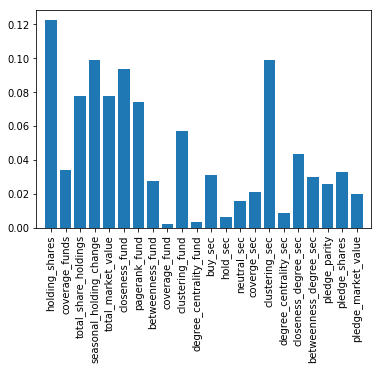

In [23]:
importance = model.feature_importances_

plt.figure()
plt.bar(range(X.shape[1]), importance)
plt.xticks(range(X.shape[1]), features, rotation = 'vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

# XGBoost

In [24]:
import xgboost as xgb
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [25]:
predicted_xgb = model.predict(X_test_scaled )

I:\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [26]:
accuracy_score(y_test, predicted_xgb)

0.743421052631579

In [27]:
mean_squared_error(y_test, predicted_xgb)

0.2565789473684211

In [28]:
 from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_test, predicted_xgb)

array([[ 37,  53],
       [ 25, 189]], dtype=int64)

In [30]:
portfolio_0510 = pd.Series(predicted_xgb, X_test.index)

In [31]:
portfolio_0510 = pd.DataFrame(portfolio_0510)

## MLP Classifier

In [32]:
clf = MLPClassifier(hidden_layer_sizes = [50,50,50,50], alpha=0.0001, activation='relu',
                   random_state = 0, solver='sgd', verbose = 0)
clf.fit(X_train_scaled, y_train)

I:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[50, 50, 50, 50], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=0,
       warm_start=False)

In [33]:
predicted = clf.predict(X_test_scaled)

In [34]:
from sklearn.metrics import recall_score, accuracy_score

In [35]:
accuracy_score(y_test, predicted)

0.7105263157894737

## SVM Classifier

In [36]:
svm = SVC().fit(X_train_scaled, y_train)
predicted_svm = svm.predict(X_test_scaled)

In [37]:
accuracy_score(y_test, predicted_svm)

0.7072368421052632

## LogisticRegression Classifier

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
log_reg = LogisticRegression().fit(X_train_scaled, y_train)
predicted_logreg = log_reg.predict(X_test_scaled)
accuracy_score(y_test, predicted_logreg)

0.7664473684210527

## SGD Classifier

In [40]:
from sklearn.linear_model import SGDClassifier

In [41]:
sgd_clf = SGDClassifier(penalty='l1').fit(X_train_scaled, y_train)
predicted_sgd = sgd_clf.predict(X_test_scaled)
accuracy_score(y_test, predicted_sgd)

I:\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.7664473684210527

## DecisionTree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
tree_clf = DecisionTreeClassifier(max_depth=2).fit(X_train_scaled, y_train)
predicted_tree = tree_clf.predict(X_test_scaled)
accuracy_score(y_test, predicted_tree)

0.7861842105263158

In [114]:
portfolio = pd.Series(predicted_tree, X_test.index)

In [115]:
portfolio = pd.DataFrame(portfolio)

In [116]:
portfolio.head()

,0
601799.SH,1.0
300308.SZ,1.0
000888.SZ,1.0
000970.SZ,1.0
001696.SZ,0.0


In [117]:
confusion_matrix(y_test, predicted_tree)

array([[ 59,  31],
       [ 34, 180]], dtype=int64)

In [118]:
from sklearn.tree import export_graphviz
from sklearn import tree

In [119]:
from IPython.display import Image  

In [122]:
import graphviz
import pydotplus

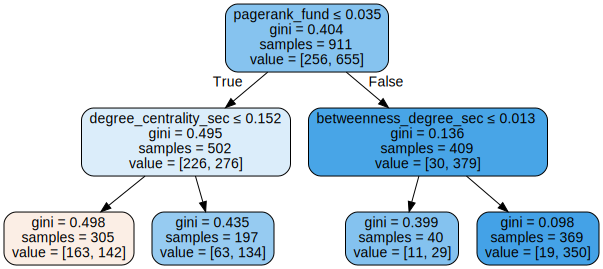

In [121]:
dot_data = tree.export_graphviz(tree_clf, out_file=None, feature_names=features,filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

In [124]:
graph = pydotplus.graph_from_dot_data(dot_data)  
img = Image(graph.create_png())  
graph.write_png("out.png")  

True

In [84]:
imp_features = pd.DataFrame(list(zip(X.columns, clf_forest.feature_importances_)), columns = ['features','importance_score'])
imp_features.sort_values(by='importance_score', ascending=False, inplace=True)
imp_features.set_index('features', inplace=True)
imp_features.head()

,importance_score
features,
pagerank_fund,0.201685
betweenness_fund,0.156433
coverage_fund,0.142024
closeness_fund,0.103960
coverage_funds,0.080119


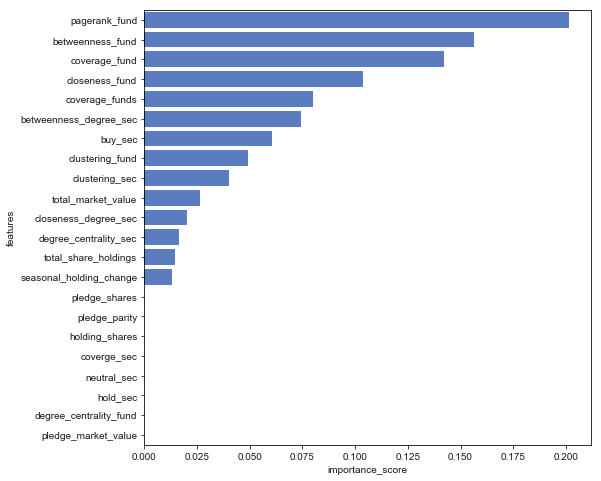

In [85]:
f, ax=plt.subplots(figsize=(8,8))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='importance_score', y=imp_features.index, data = imp_features, color='b')
pylab.rcParams['figure.figsize'] = (8, 8)
pylab.savefig('feature selection.png', dpi=400, bbox_inches = 'tight')

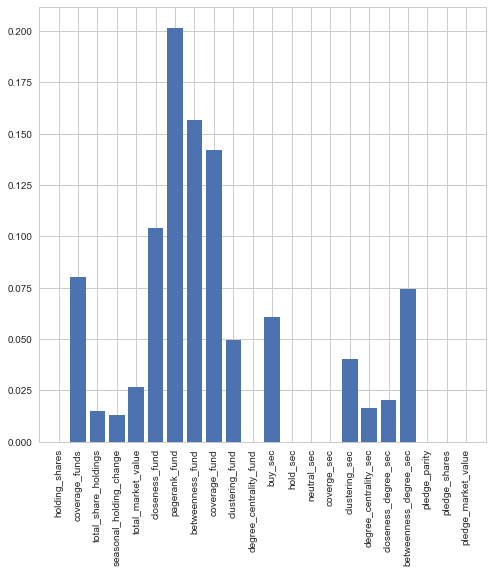

In [86]:
importance = clf_forest.feature_importances_

plt.figure()
plt.bar(range(X.shape[1]), importance)
plt.xticks(range(X.shape[1]), features, rotation = 'vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

## RandomForest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
clf_forest = RandomForestClassifier(max_depth=2, random_state=0)

In [90]:
clf_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [83]:
predicted_forest = clf_forest.predict(X_test_scaled)
accuracy_score(y_test, predicted_forest)

0.7598684210526315

## Roc Curve

In [74]:
from sklearn.metrics import roc_curve

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_tree)

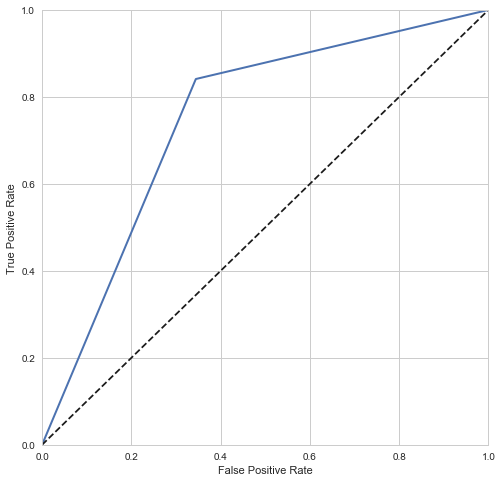

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_tree)
def plot_roc_curve(fpr,tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr,tpr)
pylab.rcParams['figure.figsize'] = (8, 8)
pylab.savefig('Roc_dt.png', dpi=400, bbox_inches = 'tight')